In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/cardio_train.csv', delimiter=";"  )

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df['weight']=df['weight'].astype('int')


In [ ]:
print(df.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
df = df.drop( ['id'], axis=1)

# Print the resulting DataFrame
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168      62    110     80            1     1      0   
1      20228       1     156      85    140     90            3     1      0   
2      18857       1     165      64    130     70            3     1      0   
3      17623       2     169      82    150    100            1     1      0   
4      17474       1     156      56    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168      76    120     80            1     1      1   
69996  22601       1     158     126    140     90            2     2      0   
69997  19066       2     183     105    180     90            3     1      0   
69998  22431       1     163      72    135     80            1     2      0   
69999  20540       1     170      72    120     80            2     1      0   

       alco  active  cardio  
0        

# ***Checking missing values (No missing values found )***

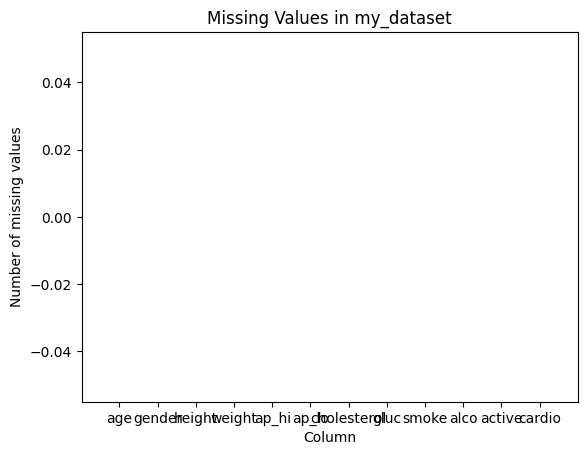

In [ ]:
# count the number of missing values in each column
missing_values = df.isna().sum()

# create a bar plot of the missing values
plt.bar(missing_values.index, missing_values.values)

# add labels to the plot
plt.title('Missing Values in my_dataset')
plt.xlabel('Column')
plt.ylabel('Number of missing values')

# show the plot
plt.show()

# ***Checking outliers in dataframe***

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


# calculate the z-scores of the numerical columns
z_scores = df.select_dtypes(include=[float, int]).apply(zscore)

# identify columns with z-scores greater than 3
outlier_cols = z_scores.columns[(np.abs(z_scores) > 3).any()].tolist()

# print the columns with outliers
print("Columns with outliers:", outlier_cols)


Columns with outliers: ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'gluc', 'smoke', 'alco']


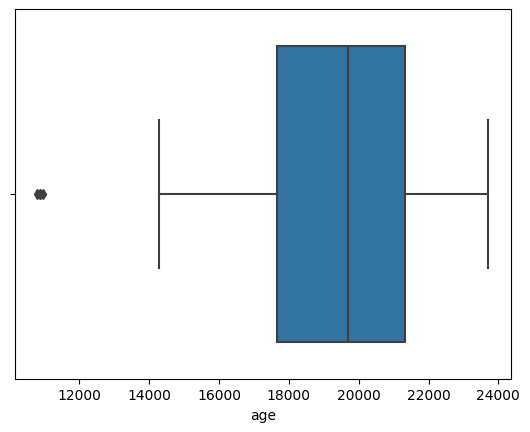

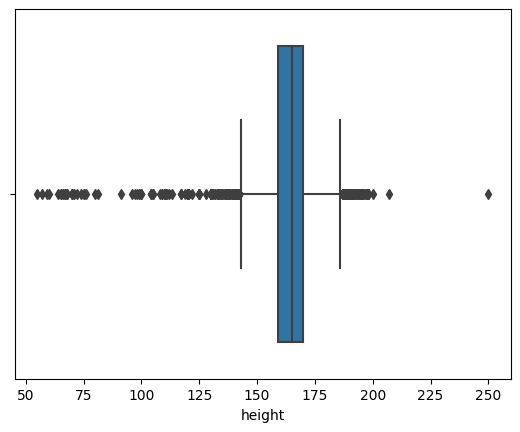

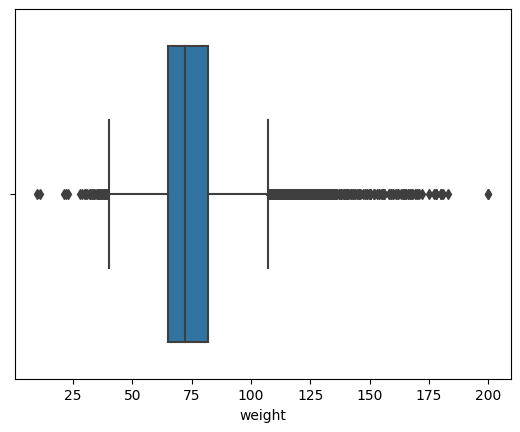

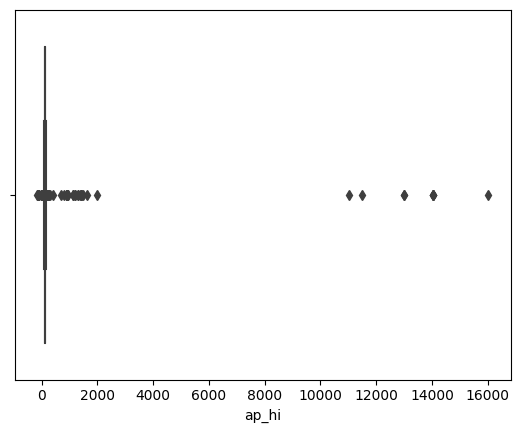

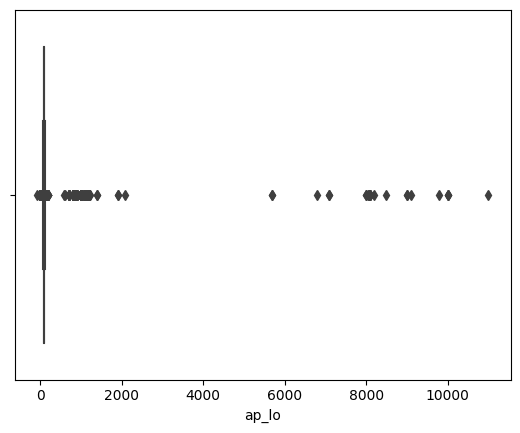

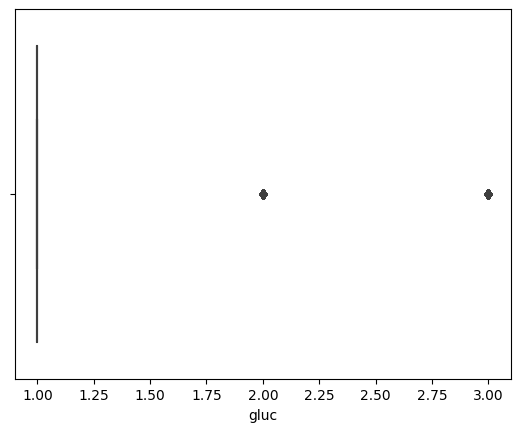

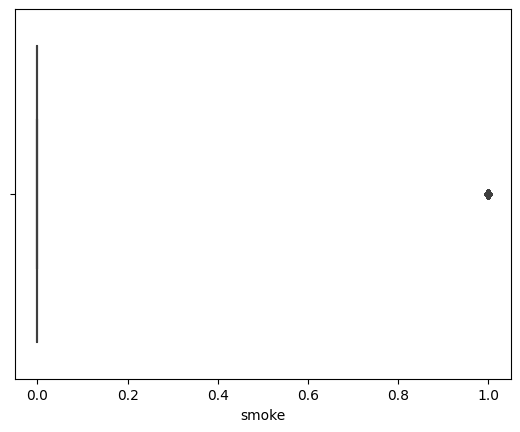

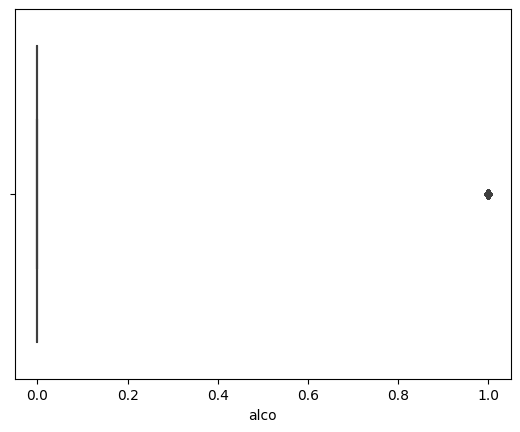

In [ ]:
import pandas as pd
import seaborn as sns

# create boxplots for each variable
for var in outlier_cols:
    sns.boxplot(x=df[var])
    plt.show()

# ***EDA***

<Figure size 1600x1600 with 0 Axes>

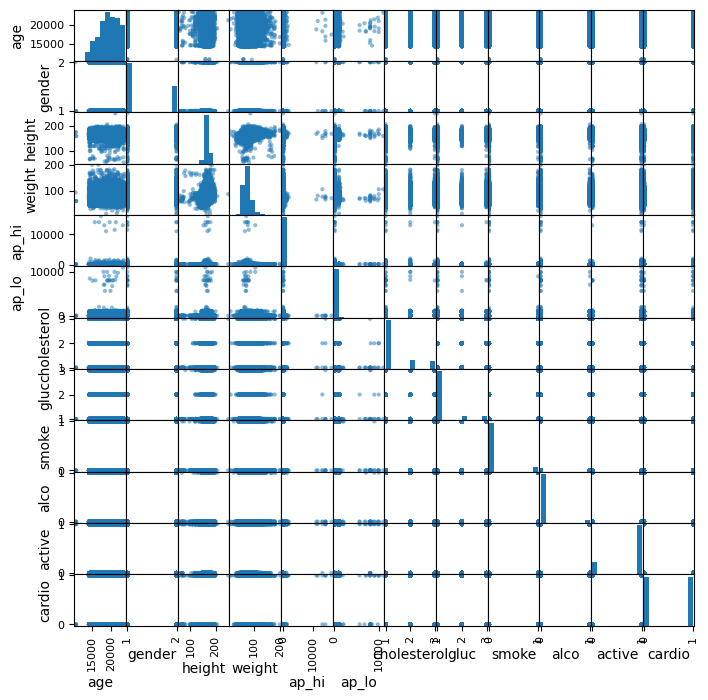

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a scatter plot matrix
# Create a scatter plot matrix with higher resolution
fig = plt.figure(figsize=(8, 8), dpi=200)
pd.plotting.scatter_matrix(df, figsize=(8, 8), diagonal='hist')

# Show the plot
plt.show()


In [ ]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

# ***Checking ranges for Diastolic blood pressure and Systolic blood pressure values***

In [ ]:
value_counts = df['ap_hi'].value_counts().unique
print(value_counts)

<bound method Series.unique of  120     27699
 140      9506
 130      8961
 110      8644
 150      4450
         ...  
 1620        1
 199         1
-150         1
-115         1
 2000        1
Name: ap_hi, Length: 153, dtype: int64>


In [ ]:
# Count values above 200 in the 'ap_hi' column
count_above_200 = (df['ap_hi'] > 200).sum()

print("Number of values above 200:", count_above_200)

Number of values above 200: 100


In [ ]:
# Filter values above 200 in the 'ap_hi' column
values_above_200 = df[df['ap_hi'] > 200]['ap_hi']

# Print the values above 20
print(values_above_200)

1328      220
1876      902
2014      906
2142      210
2278      220
         ... 
67710     240
68579     220
68663     906
69329     240
69370    2000
Name: ap_hi, Length: 100, dtype: int64


In [ ]:
df = df[df['ap_hi'] <= 200]

In [ ]:
df = df[df['ap_lo'] <= 130]

In [ ]:
import pandas as pd

# Get the columns with negative values
negative_columns = df.columns[(df < 0).any()]

# Print the columns with negative values
print("Columns with negative values:")
print(negative_columns)


Columns with negative values:
Index(['ap_hi', 'ap_lo'], dtype='object')


In [ ]:
# Replace negative values with NaN
df[df < 0] = np.nan

# Alternatively, replace negative values with 0
# df[df < 0] = 0

# Remove rows with NaN values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

# Print the updated dataset
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168      62  110.0   80.0            1     1      0   
1      20228       1     156      85  140.0   90.0            3     1      0   
2      18857       1     165      64  130.0   70.0            3     1      0   
3      17623       2     169      82  150.0  100.0            1     1      0   
4      17474       1     156      56  100.0   60.0            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
68886  19240       2     168      76  120.0   80.0            1     1      1   
68887  22601       1     158     126  140.0   90.0            2     2      0   
68888  19066       2     183     105  180.0   90.0            3     1      0   
68889  22431       1     163      72  135.0   80.0            1     2      0   
68890  20540       1     170      72  120.0   80.0            2     1      0   

       alco  active  cardio  
0        

In [ ]:
import pandas as pd

# Get the columns with negative values
negative_columns = df.columns[(df < 0).any()]

# Print the columns with negative values
print("Columns with negative values:")
print(negative_columns)

Columns with negative values:
Index([], dtype='object')


# ***Feature Engineering***

In [ ]:
# Create new features based on existing ones
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2  # Body mass index
df['ap_diff'] = df['ap_hi'] - df['ap_lo']  # Difference between systolic and diastolic blood pressure
df['age_years'] = (df['age'] / 365).astype(int)  # Age in years
df['cholesterol_gluc'] = df['cholesterol'] * df['gluc']  # Interaction between cholesterol and glucose levels

# Convert gender to binary
df['gender'] = df['gender'].map({1: 0, 2: 1})

# Drop unnecessary columns
df.drop(['age'], axis=1, inplace=True)


In [ ]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_diff,age_years,cholesterol_gluc
0,1,168,62,110.0,80.0,1,1,0,0,1,0,21.967120,30.0,50,1
1,0,156,85,140.0,90.0,3,1,0,0,1,1,34.927679,50.0,55,3
2,0,165,64,130.0,70.0,3,1,0,0,0,1,23.507805,60.0,51,3
3,1,169,82,150.0,100.0,1,1,0,0,1,1,28.710479,50.0,48,1
4,0,156,56,100.0,60.0,1,1,0,0,0,0,23.011177,40.0,47,1


In [ ]:
print(df.columns)

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'bmi', 'ap_diff', 'age_years',
       'cholesterol_gluc'],
      dtype='object')


0    44879
1    24012
Name: gender, dtype: int64


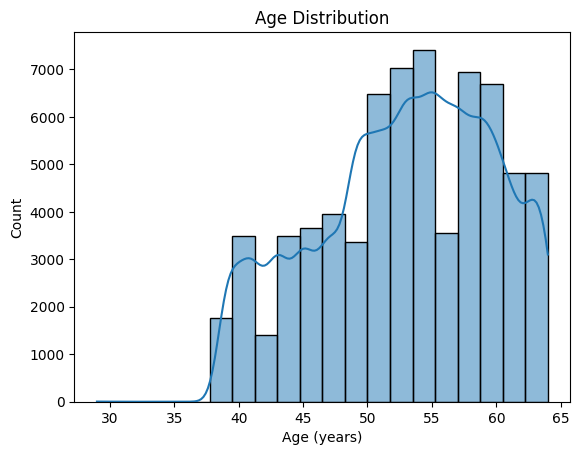

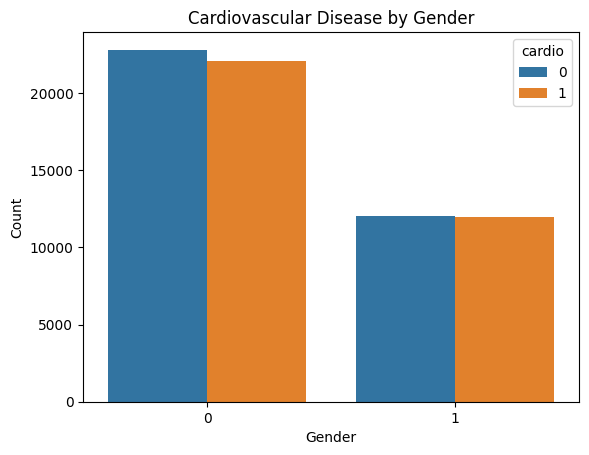

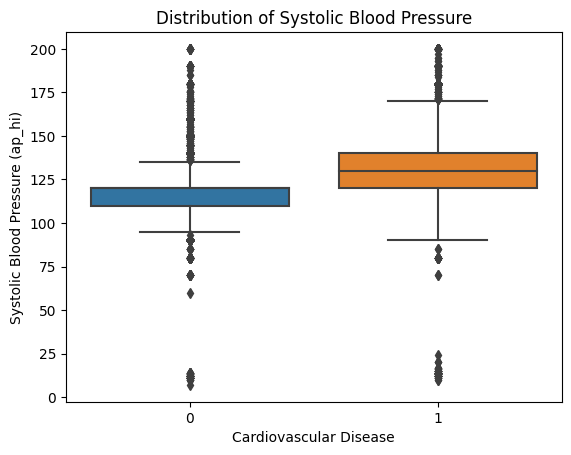

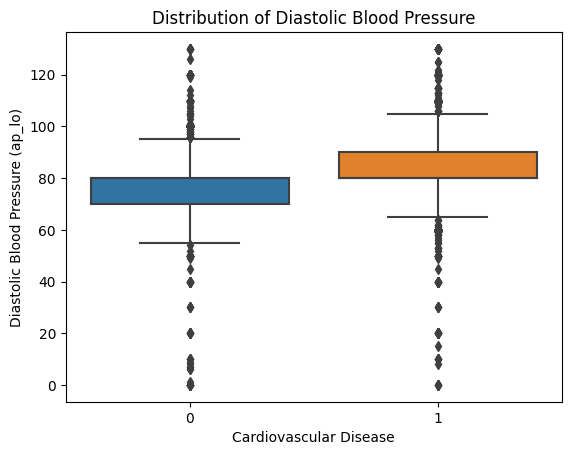

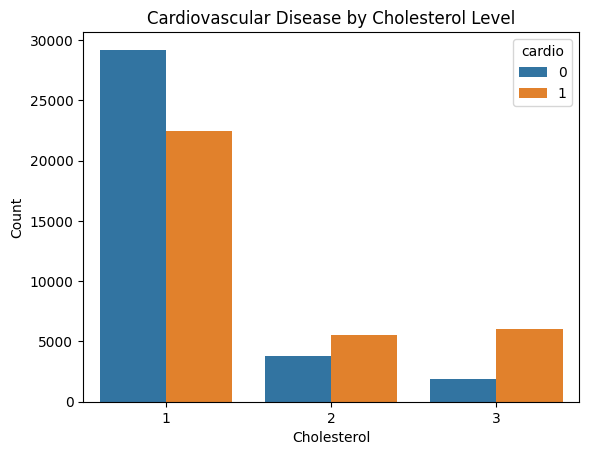

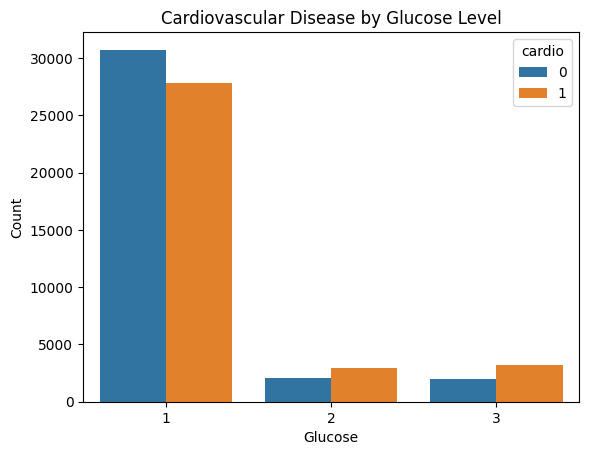

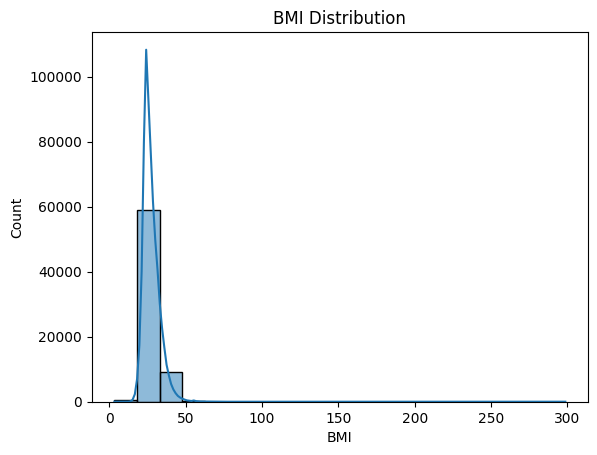

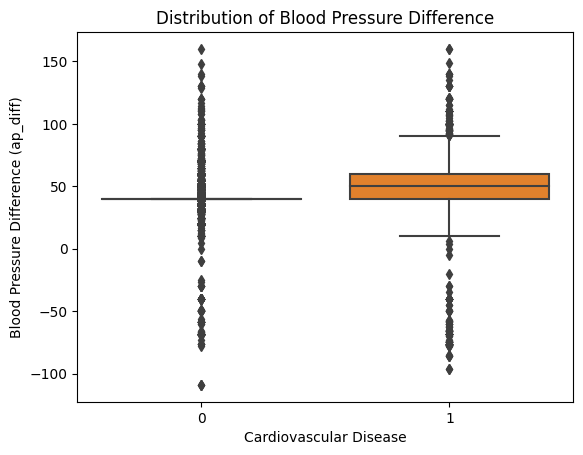

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
# Gender distribution
gender_counts = df['gender'].value_counts()
print(gender_counts)

# Height, Weight, BMI distributions
df[['height', 'weight', 'bmi']].describe()

# Age distribution
sns.histplot(df['age_years'], bins=20, kde=True)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Bivariate Analysis
# Cardio vs. Gender
sns.countplot(x='gender', hue='cardio', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Cardiovascular Disease by Gender')
plt.show()

# Cardio vs. Blood Pressure
sns.boxplot(x='cardio', y='ap_hi', data=df)
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.title('Distribution of Systolic Blood Pressure')
plt.show()

sns.boxplot(x='cardio', y='ap_lo', data=df)
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.title('Distribution of Diastolic Blood Pressure')
plt.show()

# Cardio vs. Cholesterol and Glucose
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.title('Cardiovascular Disease by Cholesterol Level')
plt.show()

sns.countplot(x='gluc', hue='cardio', data=df)
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.title('Cardiovascular Disease by Glucose Level')
plt.show()

# Feature Engineering
# BMI Distribution
sns.histplot(df['bmi'], bins=20, kde=True)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.show()

# Blood Pressure Difference (ap_diff) vs. Cardio
sns.boxplot(x='cardio', y='ap_diff', data=df)
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Blood Pressure Difference (ap_diff)')
plt.title('Distribution of Blood Pressure Difference')
plt.show()


# ***Histogram of numerical Values***

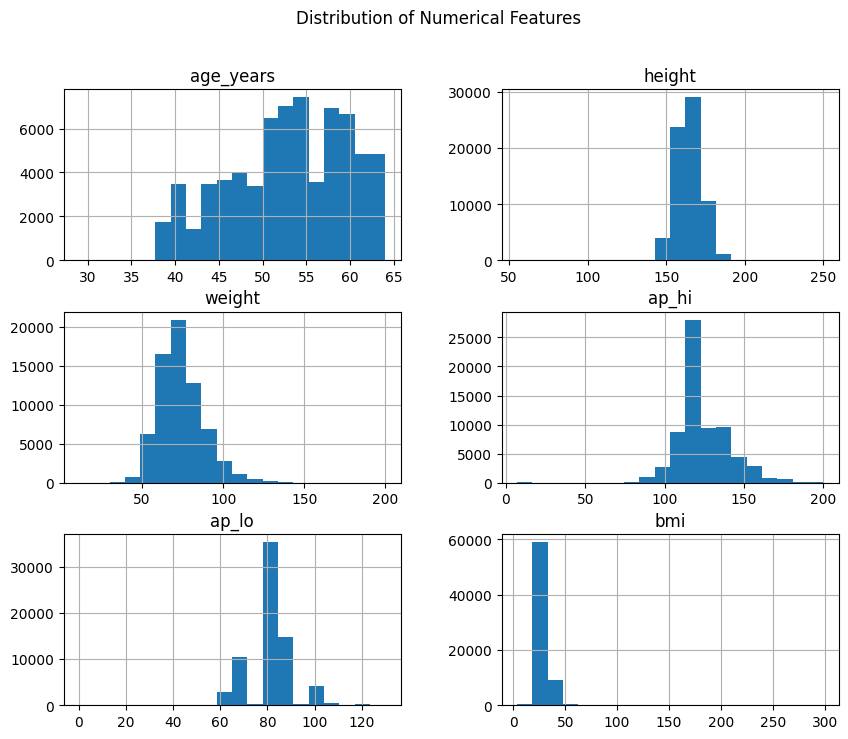

In [ ]:
# Create histograms of numerical features
num_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo','bmi']
df[num_cols].hist(bins=20, figsize=(10,8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

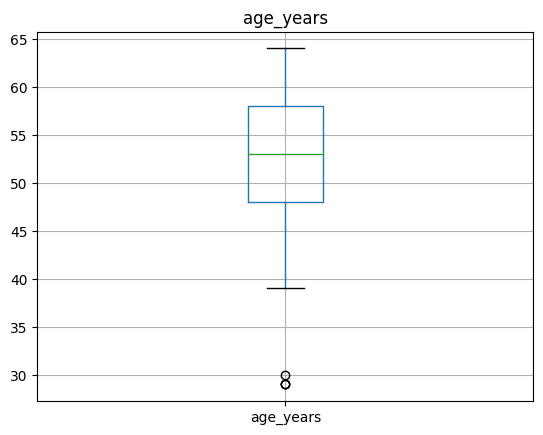

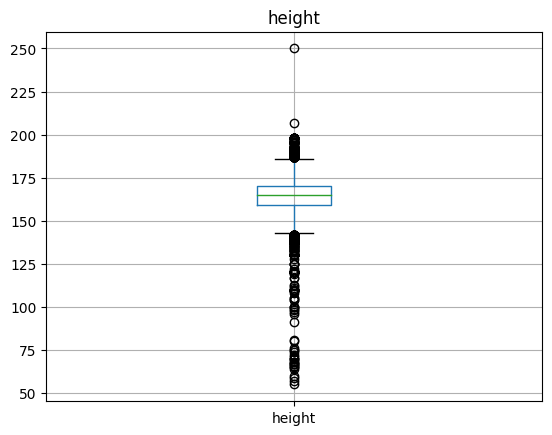

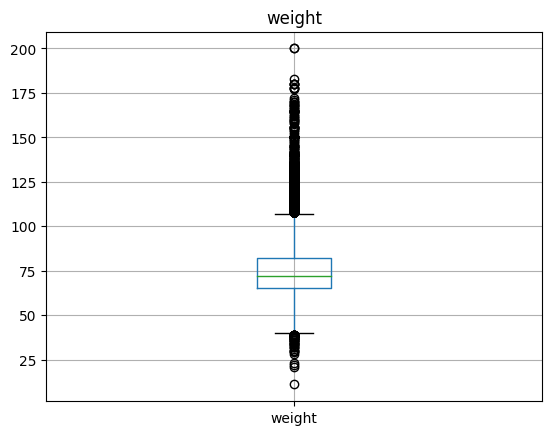

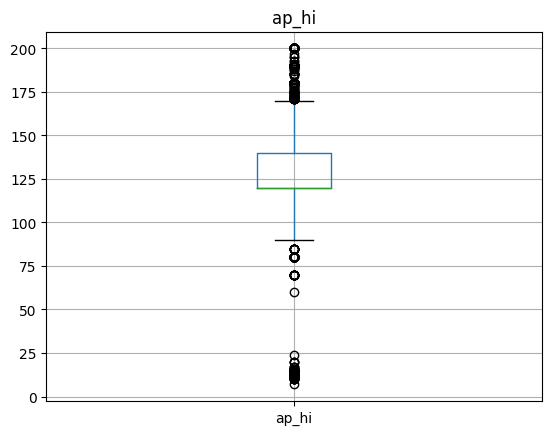

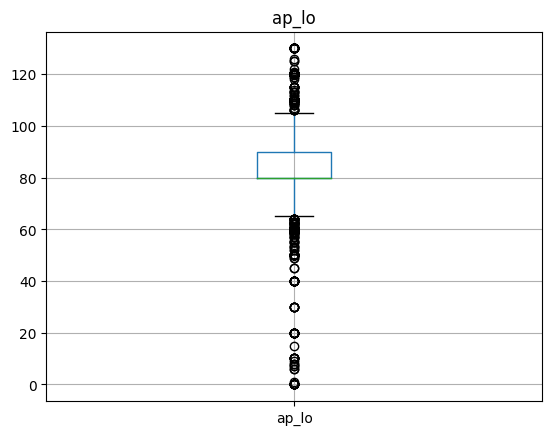

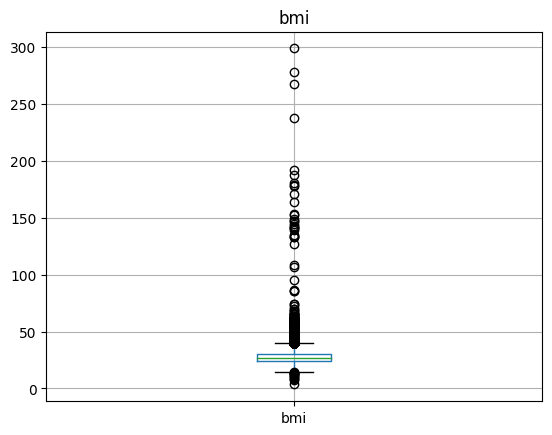

In [ ]:
for col in num_cols:
    df.boxplot(column=col)
    plt.title(col)
    plt.show()

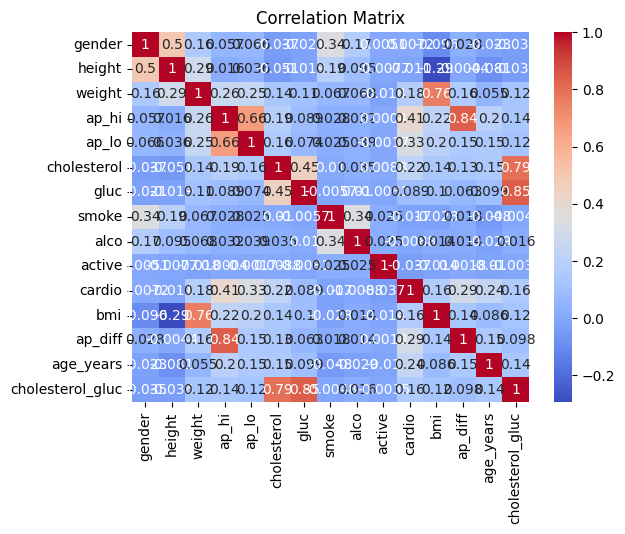

In [ ]:
# Plot the correlation matrix using a heatmap
corr = df.corr()
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df.columns)

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'bmi', 'ap_diff', 'age_years',
       'cholesterol_gluc'],
      dtype='object')


# ***Using RFE***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier # You can choose the appropriate model here

# Assuming you have already split your data into features (X) and target (y)
X = df.drop('cardio', axis=1)
y = df['cardio']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the model you want to use for feature selection
model = RandomForestClassifier()

# Initialize RFE with the chosen model and the number of features you want to select
num_features_to_select = 5 # You can adjust this number based on your preference
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit RFE to your data
rfe.fit(X, y)

# Get the support and ranking of each feature
selected_features = X.columns[rfe.support_]
feature_ranking = rfe.ranking_

# Print the selected features and their ranking
print("Selected Features:")
print(selected_features)

print("\nFeature Ranking:")
print(pd.Series(feature_ranking, index=X.columns).sort_values())

# Now, we can use the 'selected_features' to train your machine learning model
# with the reduced set of features.


Selected Features:
Index(['height', 'weight', 'ap_hi', 'bmi', 'age_years'], dtype='object')

Feature Ranking:
height               1
weight               1
ap_hi                1
bmi                  1
age_years            1
ap_lo                2
ap_diff              3
cholesterol_gluc     4
cholesterol          5
gender               6
active               7
smoke                8
gluc                 9
alco                10
dtype: int64


# ***Tree Based Models***

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target variable
X = df[['height', 'weight', 'ap_hi', 'bmi', 'age_years']]

y = df['cardio']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.7160897017200087
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6973
           1       0.75      0.63      0.69      6806

    accuracy                           0.72     13779
   macro avg       0.72      0.72      0.71     13779
weighted avg       0.72      0.72      0.71     13779



# ***Hyper Parameter Tuning***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report


# Separate features and target variable
X = df[['height', 'weight', 'ap_hi', 'bmi', 'age_years']]
y = df['cardio']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Build the AdaBoost classifier
clf = AdaBoostClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best classifier from grid search
best_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Print the best parameters and evaluation metrics
print('Best Parameters:', grid_search.best_params_)
print('Classification Report:')
print(classification_report(y_test, y_pred))


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6973
           1       0.75      0.63      0.69      6806

    accuracy                           0.72     13779
   macro avg       0.72      0.72      0.71     13779
weighted avg       0.72      0.72      0.71     13779



# *** Feature Selection by Chi Square method***

In [ ]:
# Replace negative values with NaN
df[df < 0] = np.nan

# Alternatively, replace negative values with 0
# df[df < 0] = 0

# Remove rows with NaN values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

# Print the updated dataset
print(df)

       gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           1     168      62  110.0   80.0            1     1      0     0   
1           0     156      85  140.0   90.0            3     1      0     0   
2           0     165      64  130.0   70.0            3     1      0     0   
3           1     169      82  150.0  100.0            1     1      0     0   
4           0     156      56  100.0   60.0            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
68653       1     168      76  120.0   80.0            1     1      1     0   
68654       0     158     126  140.0   90.0            2     2      0     0   
68655       1     183     105  180.0   90.0            3     1      0     1   
68656       0     163      72  135.0   80.0            1     2      0     0   
68657       0     170      72  120.0   80.0            2     1      0     0   

       active  cardio        bmi  ap_diff  age_year

In [ ]:
import pandas as pd

# Get the columns with negative values
negative_columns = df.columns[(df < 0).any()]

# Print the columns with negative values
print("Columns with negative values:")
print(negative_columns)

Columns with negative values:
Index([], dtype='object')


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report


# Separate features and target variable
target_column = 'cardio'
X = df[['height', 'weight', 'ap_hi', 'bmi', 'age_years']]  # Features
y = df[target_column]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection on training set
selector = SelectKBest(chi2, k=5)  # Number of features to select
X_train_new = selector.fit_transform(X_train, y_train)

# Select the same features on the test set
X_test_new = selector.transform(X_test)

# Build the AdaBoost classifier
clf = AdaBoostClassifier(random_state=42)

# Train the classifier
clf.fit(X_train_new, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_new)

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6990
           1       0.75      0.63      0.69      6742

    accuracy                           0.72     13732
   macro avg       0.72      0.72      0.71     13732
weighted avg       0.72      0.72      0.71     13732



In [ ]:

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.7165744247014273
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6990
           1       0.75      0.63      0.69      6742

    accuracy                           0.72     13732
   macro avg       0.72      0.72      0.71     13732
weighted avg       0.72      0.72      0.71     13732

ROC-AUC Score: 0.7150453098866923


Accuracy: 0.7165744247014273
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6990
           1       0.75      0.63      0.69      6742

    accuracy                           0.72     13732
   macro avg       0.72      0.72      0.71     13732
weighted avg       0.72      0.72      0.71     13732

ROC-AUC Score: 0.7150453098866923


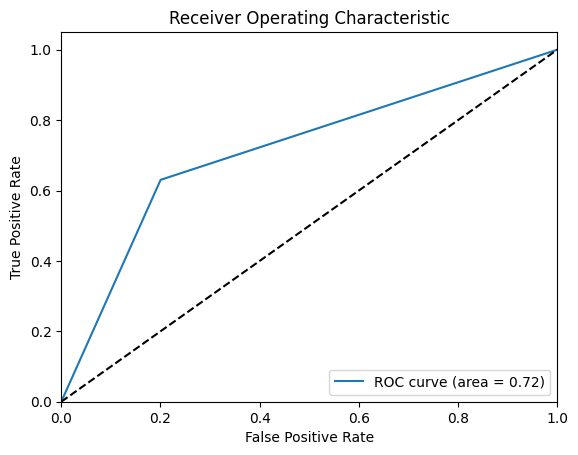

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[5590 1400]
 [2492 4250]]


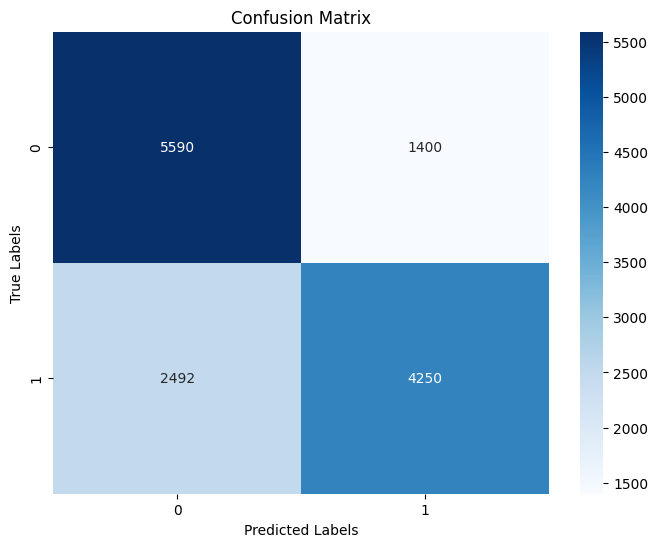

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

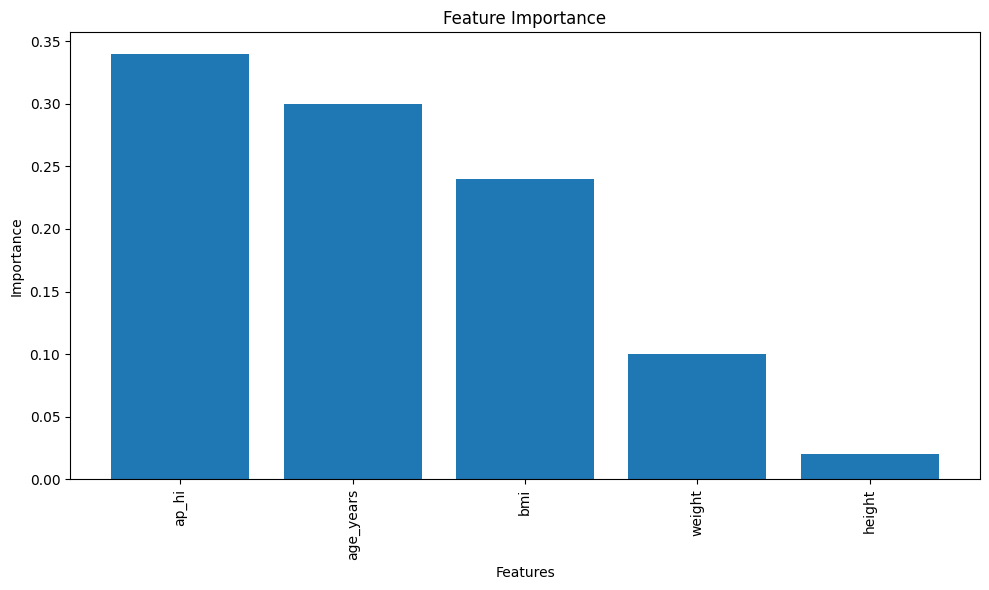

In [ ]:
# Train the classifier
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort feature importances in descending order
feature_importances.sort_values('Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances['Importance'], align="center")
plt.xticks(range(len(feature_importances)), feature_importances['Feature'], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()




# *** a ROC-AUC score of 0.7248 indicates that the AdaBoost classifier has some discriminatory power in identifying the positive class, but there is room for improvement. ***

# ***Extra Tree Classifier***




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report


# Separate features and target variable
target_column = 'cardio'  # Replace 'cardio' with the appropriate name
X = df[['height', 'weight', 'ap_hi', 'bmi', 'age_years']]  # Features
y = df[target_column]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Build the Extra Trees Classifier
clf = ExtraTreesClassifier(random_state=42)

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(clf, param_grid, n_iter=10, scoring='accuracy', cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator and predict on the test set
best_estimator = random_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Accuracy: 0.718540635013108
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6990
           1       0.73      0.68      0.70      6742

    accuracy                           0.72     13732
   macro avg       0.72      0.72      0.72     13732
weighted avg       0.72      0.72      0.72     13732



Confusion Matrix:
[[4862 2128]
 [2389 4353]]


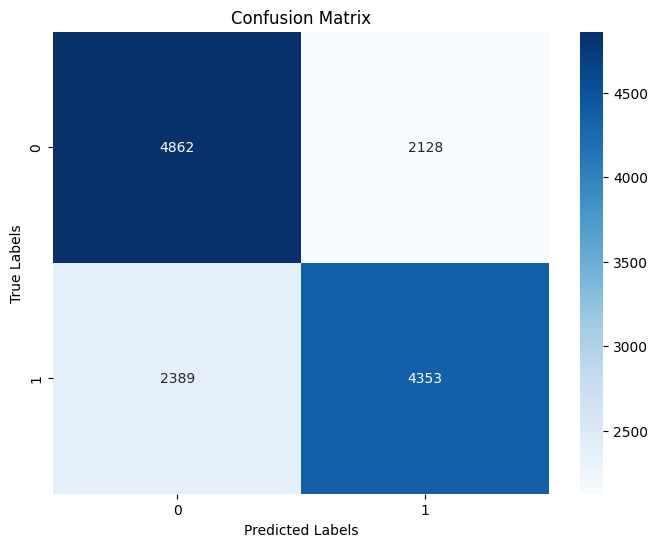

ROC-AUC Score: 0.6945842346293747


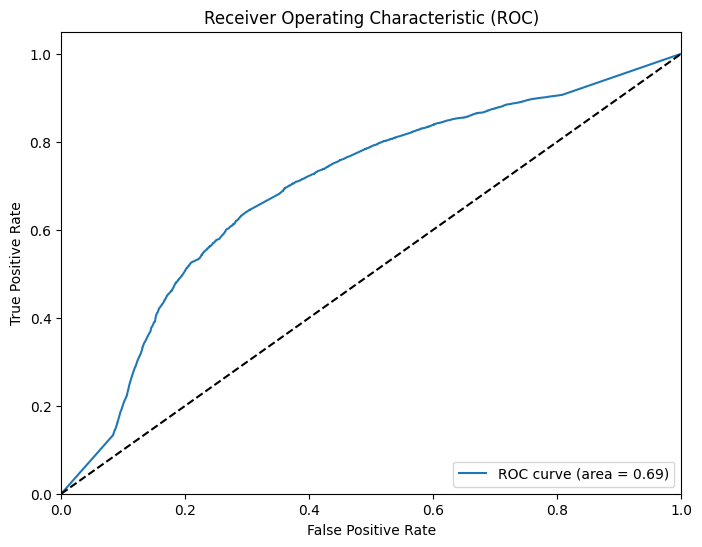

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate probabilities for ROC-AUC curve
y_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", roc_auc)

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

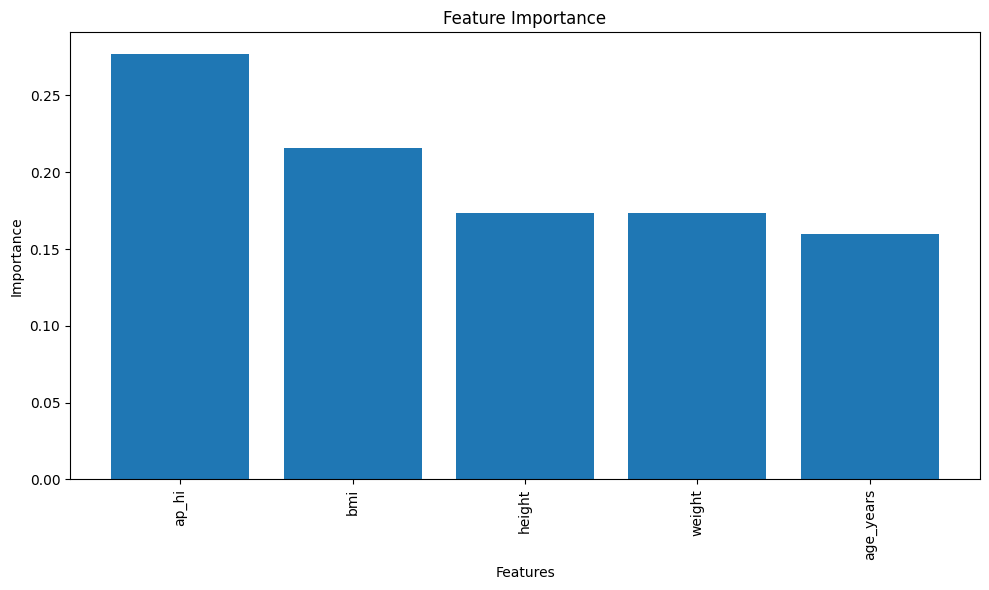

In [ ]:
# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Get feature names
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# ***Neural Network***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Separate features and target variable
target_column = 'cardio'  # Replace 'cardio' with the appropriate name
X = df[['height', 'weight', 'ap_hi', 'bmi', 'age_years']]  # Features
y = df[target_column]  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
1717/1717 [==============================] - 6s 3ms/step - loss: 0.5629 - accuracy: 0.7179
Epoch 2/10
1717/1717 [==============================] - 4s 2ms/step - loss: 0.5581 - accuracy: 0.7206
Epoch 3/10
1717/1717 [==============================] - 7s 4ms/step - loss: 0.5570 - accuracy: 0.7216
Epoch 4/10
1717/1717 [==============================] - 5s 3ms/step - loss: 0.5561 - accuracy: 0.7221
Epoch 5/10
1717/1717 [==============================] - 5s 3ms/step - loss: 0.5560 - accuracy: 0.7223
Epoch 6/10
1717/1717 [==============================] - 6s 4ms/step - loss: 0.5555 - accuracy: 0.7230
Epoch 7/10
1717/1717 [==============================] - 4s 2ms/step - loss: 0.5553 - accuracy: 0.7225
Epoch 8/10
1717/1717 [==============================] - 4s 2ms/step - loss: 0.5549 - accuracy: 0.7228
Epoch 9/10
1717/1717 [==============================] - 5s 3ms/step - loss: 0.5549 - accuracy: 0.7231
Epoch 10/10
1717/1717 [==============================] - 5s 3ms/step - loss: 0.554

In [ ]:
# Predict the test set labels
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert predictions to 1D array
y_pred = y_pred.flatten()


430/430 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.7181036993882901
Precision: 0.7350581300147372
Recall: 0.665826164342925
F1-Score: 0.6987314187874543
ROC-AUC Score: 0.7171763153617344


430/430 [==============================] - 1s 3ms/step


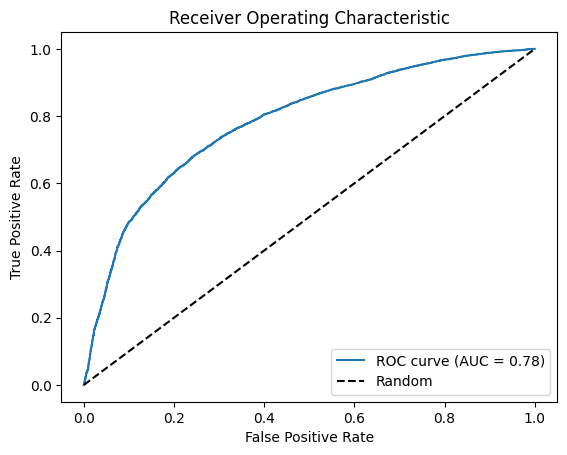

430/430 [==============================] - 1s 2ms/step


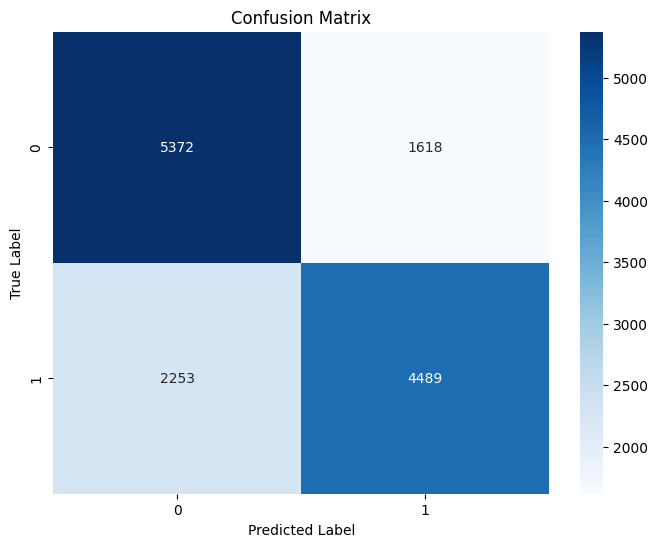

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Compute the predicted probabilities
y_pred_prob = model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Compute the predicted labels
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

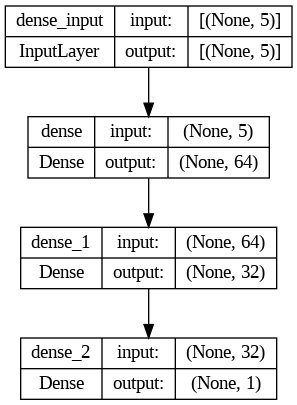

In [ ]:
from tensorflow.keras.utils import plot_model


# Plot the neural network architecture
plot_model(model, to_file='neural_network.png', show_shapes=True)


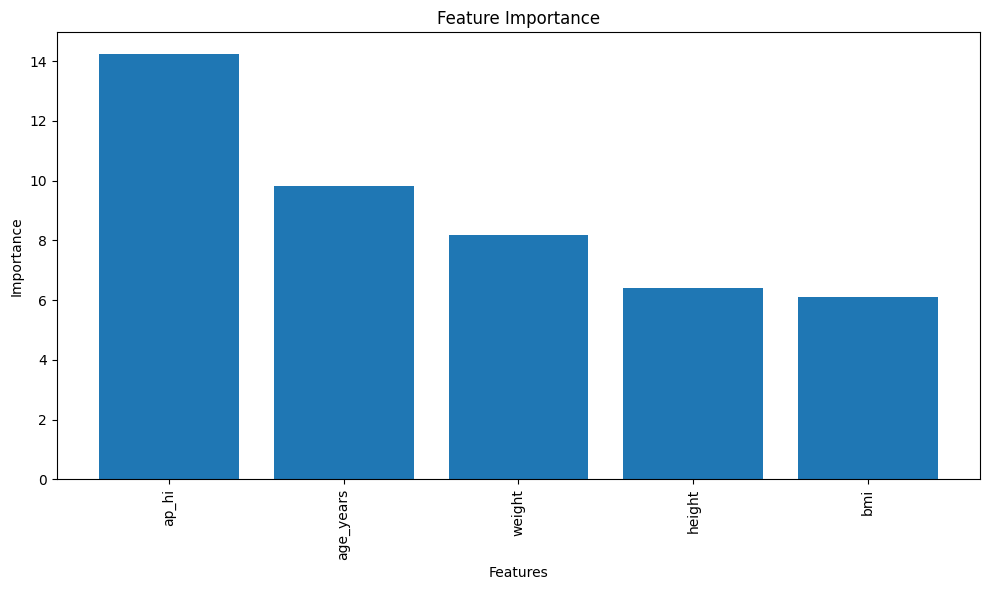

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the weights of the trained neural network model
weights = model.get_weights()[0]

# Calculate the absolute feature importance by summing the absolute weights for each feature
feature_importance = np.sum(np.abs(weights), axis=1)

# Get the feature names
feature_names = X.columns.tolist()

# Sort the features and their importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = feature_importance[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


# ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = df[['height', 'weight', 'ap_hi', 'bmi', 'age_years']]

y = df['cardio']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print accuracy and classification report
print("Accuracy:", rf_accuracy)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


Accuracy: 0.672225458782406
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      6990
           1       0.67      0.66      0.67      6742

    accuracy                           0.67     13732
   macro avg       0.67      0.67      0.67     13732
weighted avg       0.67      0.67      0.67     13732



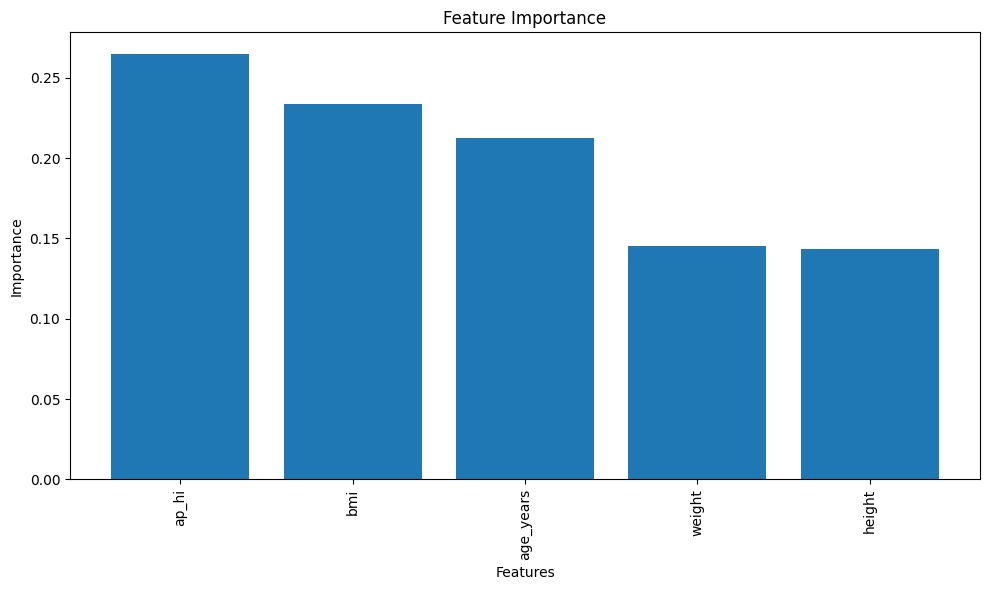

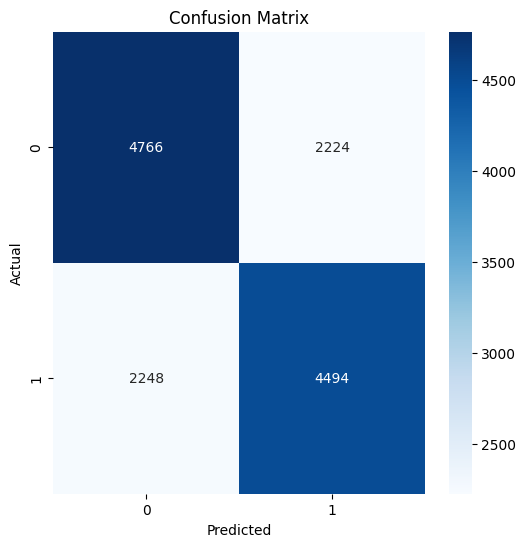

ROC-AUC Score: 0.7238812470584541


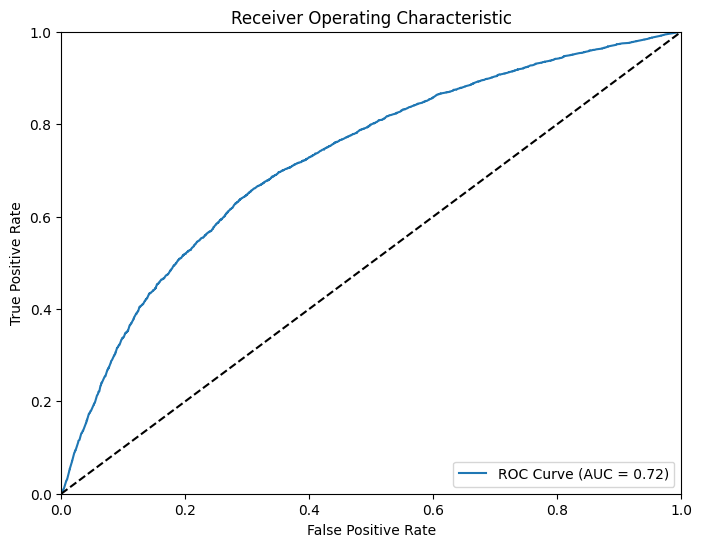

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns

# Sort features and importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = feature_importance[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# Predict on test set
y_pred = rf_classifier.predict(X_test)

# Calculate probabilities for ROC-AUC
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


# *** THE END***